
## 1. Requerimientos Generales (aplican a todos los módulos)

- **RG-1 (Lenguaje):** Todos los programas deben implementarse en **Python ≥ 3.8**.  
- **RG-2 (Librerías):** Se deberá utilizar **NumPy** para operaciones numéricas y manejo de arreglos; **Pandas** para carga y escritura de datos `.csv`
- **RG-3 (Claridad):** Cada archivo `.py` deberá incluir:  
  - Encabezado con descripción del propósito.  
  - Comentarios claros para cada función.  
  - Nombres de variables autoexplicativos.  
- **RG-4 (Reproducibilidad):** El código debe permitir replicar los resultados sin modificaciones adicionales al entorno o parámetros.  
- **RG-5 (Gestión de errores):** Validar existencia y consistencia de los archivos `.csv` antes de procesarlos.  

---

## 2. Requerimientos de `ppr.py` (Preprocesamiento de Datos)

- **RPPR-1:** Implementar función `get_features()` para calcular entropía:  
  - Modo Dispersión → parámetros: `d`, `tau`, `c`.  
  - Modo Permutación → parámetros: `d`, `tau`.  
- **RPPR-2:** Leer los archivos de entrada: `class1.csv` y `class2.csv`.  
- **RPPR-3:** Segmentar los datos en ventanas de tamaño `W` (filas).  
- **RPPR-4:** Generar archivos de salida con características:  
  - `dfeatures1.csv` → características extraídas de `class1.csv`.  
  - `dfeatures2.csv` → características extraídas de `class2.csv`.  
- **RPPR-5:** Concatenar ambos conjuntos de características en un solo archivo:  
  - `dfeatures.csv` → de dimensión `(2K, W)`.  
- **RPPR-6:** Crear archivo de etiquetas `label.csv`:  
  - Clase 1 (`K/2` filas) → etiqueta `1`.  
  - Clase 2 (`K/2` filas) → etiqueta `0`.  
- **RPPR-7:** Incluir función `main()` que ejecute de forma secuencial:  
  1. Lectura de datos.  
  2. Generación de características.  
  3. Concatenación y guardado.  
  4. Creación de etiquetas.  

---

## 3. Requerimientos de `trn.py` (Entrenamiento y Evaluación)

- **RTRN-1:** Cargar datos desde `dfeatures.csv` y `label.csv`.  
- **RTRN-2:** Implementar un modelo de **Regresión Logística** entrenado mediante **mini-batch Gradient Descent (mGD)**.  
- **RTRN-3:** Permitir ajuste de hiperparámetros:  
  - Tasa de aprendizaje (`α`).  
  - Tamaño de batch (`m`).  
  - Número máximo de iteraciones.  
- **RTRN-4:** Entrenar el modelo utilizando el conjunto de entrenamiento y guardar parámetros finales (pesos y bias).  
- **RTRN-5:** Evaluar el modelo con conjunto de prueba:  
  - Calcular matriz de confusión.  
  - Calcular F1-score para cada clase binaria.  
- **RTRN-6:** Generar reporte de rendimiento en pantalla o archivo (`results.txt`).  
- **RTRN-7:** Incluir función `main()` que ejecute de forma secuencial:  
  1. Carga de datos.  
  2. Entrenamiento del modelo.  
  3. Evaluación del modelo.  
  4. Presentación de resultados.  

---

## 4. Requerimientos de `utils.py` (Opcional, Librería de Apoyo)

> Este módulo es opcional, pero recomendable para mantener el código modular y reutilizable.  

- **RUTIL-1:** Implementar funciones auxiliares como:  
  - `save_data(data, filename)` → guardar `.csv`.  
  - `load_data(filename)` → cargar `.csv`.  
  - `plot_confusion_matrix(cm)` → graficar matriz de confusión.  
- **RUTIL-2:** Centralizar en este archivo todas las funciones comunes a `ppr.py` y `trn.py`.  
- **RUTIL-3:** Garantizar que el código principal (`ppr.py` y `trn.py`) se mantenga limpio y enfocado en lógica principal.  

---

## ppr.py


Propósito  
El propósito de este programa es crear nuevas características desde la data original utilizando la entropía de Dispersión y la entropía de Permutación.  

Función Principal  
Nombre de la función: `get_features()`  
Descripción: Esta función crea características de entropía a partir de los archivos `class1.csv` y `class2.csv`.  

Opciones de Cálculo de Entropía  
1. Opción Dispersión  
   - Parámetros:  
     - d: dimensión embedding  
     - tau: tiempo de retardo  
     - c: número de clases  

2. Opción Permutación  
   - Parámetros:  
     - d: dimensión embedding  
     - tau: tiempo de retardo  

Segmentación de Archivos  
- Los archivos de clase original deben segmentarse en ventanas de tamaño `W` (número de filas).  

Archivos de Salida  
1. `dfeatures1.csv`  
   - Derivado de `class1.csv`.  
   - W columnas: cada columna corresponde a una característica de entropía.  
   - K filas: cada fila representa una nueva muestra de características.  

2. `dfeatures2.csv`  
   - Derivado de `class2.csv`.  
   - W columnas: cada columna corresponde a una característica de entropía.  
   - K filas: cada fila representa una nueva muestra de características.  

3. `dfeatures.csv`  
   - Creado a partir de la concatenación de `dfeatures1.csv` y `dfeatures2.csv`.  
   - Tamaño resultante:  
     - 2K filas.  
     - W columnas.  

4. `label.csv`  
   - Archivo de etiquetas asociado a las clases.  
   - Clase 1: Y(1 : K/2) = 1  
   - Clase 2: Y(K/2 + 1 : N) = 0  

Estructura del Programa Principal (`main`)  
```python
def main():
    conf_entropy()
    load_data()
    F1 = get_features("class1.csv")
    F2 = get_features("class2.csv")
    F = np.concatenate((F1, F2), axis=0)
    save_data(F, "dfeatures.csv")
    save_labels("label.csv")
```

In [11]:
#----------------------------------------------
# Create Features by use 
# Dispersion Entropy and Permutation entropy
#----------------------------------------------

import pandas as pd
import numpy  as np
from utility import entropy_dispersion, entropy_permuta

_X   = None
W    = None
_F1  = None
_F2  = None

# Load parameters Entropy
def conf_entropy():    
    conf = pd.read_csv("config/conf_ppr.csv", header=None)
    opt_code = str(conf.iloc[0,0]).strip()
    if opt_code == "1":
        opt = "dispersion"
    elif opt_code == "2":
        opt = "permutation"
    else:
        raise ValueError("Código de entropía inválido (1=dispersion, 2=permutation)")
    d   = int(conf.iloc[1,0])
    tau = int(conf.iloc[2,0])
    c   = int(conf.iloc[3,0])
    global W
    W = int(conf.iloc[4,0]) if conf.shape[0] >= 5 else None
    return(opt,d,tau,c)

# Load Data
def load_data(nFile):
    global _X
    _X = pd.read_csv(nFile, header=None).values
    return _X

# Obtain entropy : dispersión and Permutation
def gets_entropy(x,opt,d,tau,c):
    if opt == "dispersion":
        return entropy_dispersion(x,d,tau,c)
    elif opt == "permutation":
        return entropy_permuta(x,d,tau)
    else:
        raise ValueError("Método inválido")

# Obtain Features by use Entropy    
def gets_features():
    if _X is None:
        raise RuntimeError("No hay datos cargados. Llame primero a load_data().")
    X = _X
    N,L = X.shape
    W_eff = W if (W is not None and 1 <= W <= N) else N
    K = N // W_eff
    opt,d,tau,c = conf_entropy()
    F_rows = []
    base = 0
    for _ in range(K):
        seg = X[base:base+W_eff,:]
        feats = [ gets_entropy(seg[:,j],opt,d,tau,c) for j in range(L) ]
        F_rows.append(feats)
        base += W_eff
    return np.array(F_rows,dtype=float)

def save_data(F):
    global _F1,_F2
    pd.DataFrame(_F1).to_csv("dfeatures1.csv",header=False,index=False)
    pd.DataFrame(_F2).to_csv("dfeatures2.csv",header=False,index=False)
    pd.DataFrame(F).to_csv("dfeatures.csv",header=False,index=False)
    K1,K2=_F1.shape[0],_F2.shape[0]
    Y=np.concatenate([np.ones((K1,1)),np.zeros((K2,1))],axis=0)
    pd.DataFrame(Y).to_csv("label.csv",header=False,index=False)

# Beginning ...
def main():
    conf_entropy()
    load_data("data/class1.csv")
    F1 = gets_features()
    load_data("data/class2.csv")
    F2 = gets_features()
    F  = np.concatenate((F1,F2),axis=0)
    global _F1,_F2
    _F1,_F2 = F1,F2
    save_data(F)

if __name__ == '__main__':
    main()


## trn.py


Etapa 2 – Algoritmo de Entrenamiento (trn.py)  

Propósito  
Este programa implementa el algoritmo de entrenamiento de un modelo de regresión logística, utilizando descenso de gradiente con momentum. Se encarga de dividir los datos en conjuntos de entrenamiento y prueba, entrenar el modelo y almacenar los resultados obtenidos.  

Carga y Preparación de Datos  
- Cargar archivos `dfeatures.csv` y `label.csv`.  
- Reordenar aleatoriamente la matriz de características y el vector de clases para evitar sesgos.  
- Crear función para dividir los datos en conjuntos de entrenamiento y prueba:  
  - Datos de Entrenamiento:  
    - Archivos de salida: `dtrn.csv` y `dtrn_label.csv`.  
    - Número de muestras: L = round(N * p / 100).  
    - p: porcentaje de entrenamiento (ej. 60 o 80).  
  - Datos de Prueba:  
    - Archivos de salida: `dtst.csv` y `dtst_label.csv`.  
    - Número de muestras: K = N – L.  

Función de Entrenamiento – trn_logistic()  
- Cargar parámetros de configuración desde archivo `conf_train.csv`.  
- Implementar algoritmo de **descenso de gradiente con momentum**.  
- Aprender y actualizar los pesos del modelo en cada iteración.  
- Guardar los resultados del entrenamiento en archivos:  
  - `pesos.csv` → matriz de pesos finales del modelo.  
  - `costo.csv` → vector de costos por iteración.  
    - Número de filas: máximo de iteraciones.  
    - Número de columnas: 1.  

Estructura del Programa Principal (main)  
```python
def main():
    conf_train()
    load_data()
    train()
    save_w_cost(W, Cost, 'pesos.csv', 'costo.csv')
```

In [ ]:
# Logistic Regression's Training :

import numpy as np

#Save weights and Cost
def save_w_cost(W,Cost,fW='pesos.csv',fC='costo.csv'):
    np.savetxt(fW,W,delimiter=',')
    np.savetxt(fC,Cost.reshape(-1,1),delimiter=',')

def iniWs(n_features):
    W=np.zeros((n_features,1))
    V=np.zeros_like(W)
    return(W,V)

# Load data to train 
def load_data():
    X=np.loadtxt('dfeatures.csv',delimiter=',')
    y=np.loadtxt('label.csv',delimiter=',').reshape(-1,1)
    idx=np.arange(X.shape[0]); np.random.shuffle(idx)
    X,y=X[idx],y[idx]
    Xb=np.hstack([X,np.ones((X.shape[0],1))])
    N=Xb.shape[0]; L=int(round(N*ptrain/100.0))
    Xtrn,ytrn=Xb[:L],y[:L]; Xtst,ytst=Xb[L:],y[L:]
    np.savetxt('dtrn.csv',Xtrn,delimiter=',')
    np.savetxt('dtrn_label.csv',ytrn,delimiter=',')
    np.savetxt('dtst.csv',Xtst,delimiter=',')
    np.savetxt('dtst_label.csv',ytst,delimiter=',')
    global X_trn,y_trn,X_tst,y_tst
    X_trn,y_trn,X_tst,y_tst=Xtrn,ytrn,Xtst,ytst

#Training by use mGD
def train():
    N,d=X_trn.shape
    W,V=iniWs(d)
    Cost=np.zeros((epochs,1))
    for k in range(epochs):
        z=X_trn@W
        y=1.0/(1.0+np.exp(-z))
        J=-(1.0/N)*np.sum(y_trn*np.log(y+1e-12)+(1-y_trn)*np.log(1-y+1e-12))
        g=(1.0/N)*(X_trn.T@(y-y_trn))
        V=beta*V+alpha*g
        W=W-V
        Cost[k,0]=J
    global W_opt,Cost_vec
    W_opt,Cost_vec=W,Cost

def conf_train(nFile='config/conf_train.csv'):
    vals=np.loadtxt(nFile,delimiter=',',ndmin=1)
    global epochs,alpha,beta,ptrain
    epochs=int(vals[0]); alpha=float(vals[1]); ptrain=int(vals[2])
    beta=0.9

# Beginning ...
def main():    
    conf_train()
    load_data()   
    train()             
    save_w_cost(W_opt,Cost_vec,'pesos.csv','costo.csv')

if __name__ == '__main__':   
    main()


[Iter    0] Cost=0.6931 | Acc=51.88% | y.mean=0.500


"\n# Logistic Regression's Training :\n\nimport numpy      as np\nimport utility    as ut\n\n#Save weights and Cost\ndef save_w_cost():\n    ...\n    return\n#\ndef iniWs():\n    ...\n    return(W,V)\n# Load config train for Regression\n#\n#Training by use mGD\ndef train():    \n\n    ....\n    return()\n# Load data to train \ndef load_data():\n\n\n    return()\n#\ndef conf_train(nFile):\n    ....\n    return()\n\n# Beginning ...\ndef main():    \n    conf_train()\n    load_data()   \n    train()             \n    save_w_cost(W,Cost, 'pesos.csv','costo.csv')\n\nif __name__ == '__main__':   \n\t main()\n\n"

In [ ]:
# Logistic Regression's Training :
import numpy as np

# -------- Save weights and Cost ----------
def save_w_cost(W, Cost, fW='pesos.csv', fC='costo.csv'):
    np.savetxt(fW, W, delimiter=',')
    np.savetxt(fC, Cost.reshape(-1,1), delimiter=',')
    return

# -------- Initialize weights -------------
def iniWs(n_features):
    W = np.zeros((n_features, 1), dtype=float)
    V = np.zeros_like(W)
    return(W,V)

# -------- Load config --------------------
def conf_train(nFile):
    vals = np.loadtxt(nFile, delimiter=',', ndmin=1)

    global EPOCHS, ALPHA, PTRAIN
    EPOCHS = int(vals[0])
    ALPHA  = float(vals[1])
    PTRAIN = float(vals[2])

    # Si el porcentaje está en [0,1] → convertir a porcentaje real
    if 0 < PTRAIN <= 1:
        PTRAIN = int(round(PTRAIN * 100))
    else:
        PTRAIN = int(PTRAIN)

    # Validación mínima (como pide el profesor: 60<p<81)
    if not (60 <= PTRAIN <= 81):
        print(f"[ADVERTENCIA] Porcentaje {PTRAIN} fuera de rango (60-81).")

    return

# -------- Load data ----------------------
def load_data():
    X = np.loadtxt('dfeatures.csv', delimiter=',')
    y = np.loadtxt('label.csv', delimiter=',').reshape(-1,1)

    # barajar datos
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # añadir bias
    Xb = np.hstack([X, np.ones((X.shape[0],1))])

    # split train/test
    N = Xb.shape[0]
    L = int(round(N * (PTRAIN/100.0)))
    Xtrn, Ytrn = Xb[:L], y[:L]
    Xtst, Ytst = Xb[L:], y[L:]

    # guardar archivos
    np.savetxt('dtrn.csv',       Xtrn, delimiter=',')
    np.savetxt('dtrn_label.csv', Ytrn, delimiter=',')
    np.savetxt('dtst.csv',       Xtst, delimiter=',')
    np.savetxt('dtst_label.csv', Ytst, delimiter=',')

    # exponer como globales
    global X_trn, y_trn, X_tst, y_tst
    X_trn, y_trn, X_tst, y_tst = Xtrn, Ytrn, Xtst, Ytst
    return

# -------- Training -----------------------
def train():
    N, d = X_trn.shape
    W, V = iniWs(d)
    Cost = np.zeros((EPOCHS,1), dtype=float)

    for k in range(EPOCHS):
        z  = X_trn @ W
        y  = 1.0/(1.0 + np.exp(-z))   # sigmoide

        # costo
        J  = -(1.0/N)*np.sum(y_trn*np.log(y+1e-12) + (1-y_trn)*np.log(1-y+1e-12))
        g  = (1.0/N)*(X_trn.T @ (y-y_trn))   # gradiente

        V  = 0.9*V + ALPHA*g   # momentum fijo en 0.9
        W  = W - V

        Cost[k,0] = J

        # debug cada 1000 iteraciones
        if k % 1000 == 0:
            preds = (y >= 0.5).astype(int)
            acc   = np.mean(preds == y_trn)
            print(f"[Iter {k}] Costo={J:.4f}, Acc={acc:.2f}")

    global W_opt, Cost_vec
    W_opt, Cost_vec = W, Cost
    return

# -------- Main ---------------------------
def main():
    conf_train('config/conf_train.csv')
    load_data()
    train()
    save_w_cost(W_opt, Cost_vec, 'pesos.csv','costo.csv')

if __name__ == '__main__':
    main()


ZeroDivisionError: float division by zero

## tst.py

Etapa 3 – Evaluación del Modelo (eval.py)  

Cargar data de test:  
- Cargar los coeficientes desde archivo `pesos.csv`.  
- Generar los valores estimados usando Regresión Logit.  

Crear archivos de resultados:  
- Matriz de Confusión → `cmatriz.csv`, matriz de dimensión (2,2).  
- F-scores → `fscores.csv`, vector de dimensión (1,2).  

Programa Principal:  
```python
def main():
    load_data()
    load_w()
    zv = forward(xv, W)
    cm, Fsc = metricas(yv, zv)
    save_measure(cm, Fsc, 'cmatrix.csv', 'fscores.csv')
```

In [42]:
# Testing for Logistic Regresion
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def forward(xv,w):
    """
    xv: matriz de test (N x d) consistente con la dimensionalidad de w
    w : vector columna (d x 1), usualmente incluye el sesgo en la última fila
    retorna: zv (N x 1) predicción binaria {0,1}
    """
    z  = xv @ w
    y  = 1.0 / (1.0 + np.exp(-z))
    zv = (y >= 0.5).astype(int)

    # Debug en test
    print(f"[Forward] z.shape={z.shape}, y.mean={y.mean():.3f}, "
          f"preds={np.bincount(zv.ravel(), minlength=2)}")

    return(zv)
#
def measure(yv,zv):
    """
    yv: etiquetas verdaderas (N x 1) en {0,1}
    zv: predicciones binarias (N x 1) en {0,1}
    retorna:
      - cmatrix: matriz de confusión 2x2 con orden [0,1]x[0,1]
      - Fscores: vector (1x2) con F-score por clase [F0, F1]
    """
    y = yv.astype(int).ravel()
    z = zv.astype(int).ravel()
    cmatrix = np.zeros((2,2), dtype=int)
    for yi, zi in zip(y, z):
        cmatrix[yi, zi] += 1

    Fscores = np.zeros((1,2), dtype=float)
    for c in (0,1):
        tp = cmatrix[c, c]
        fp = cmatrix[1-c, c]
        fn = cmatrix[c, 1-c]
        prec = tp / (tp + fp + 1e-12)
        rec  = tp / (tp + fn + 1e-12)
        F    = 2.0 * prec * rec / (prec + rec + 1e-12)
        Fscores[0, c] = F

    return(cmatrix, Fscores)

# alias de compatibilidad con el pseudocódigo
metricas = measure

#
def save_measure(cm,Fsc,nFile1,nFile2):
    """
    Guarda:
      - nFile1: cmatriz.csv  (2x2, enteros)
      - nFile2: fscores.csv  (1x2, flotantes)
    """
    np.savetxt(nFile1, cm, fmt='%d', delimiter=',')
    np.savetxt(nFile2, Fsc, fmt='%.6f', delimiter=',')
    return()

# Load weight
def load_w(nFile=None):
    """
    Carga pesos desde CSV como vector columna.
    Por defecto lee 'pesos.csv'.
    """
    if nFile is None:
        nFile = 'pesos.csv'
    W = np.loadtxt(nFile, delimiter=',').reshape(-1,1)
    return(W)

# 
def load_data(nFile=None):
    """
    Carga datos de test (X y y).
    Por defecto:
      - Xv: dtst.csv
      - yv: dtst_label.csv
    IMPORTANTE: usar el mismo diseño de entrada que en entrenamiento
    (si el sesgo está incluido en w, no añadir columna de unos aquí).
    """
    if nFile is None:
        Xv = np.loadtxt('dtst.csv', delimiter=',')
        yv = np.loadtxt('dtst_label.csv', delimiter=',').reshape(-1,1)
        return(Xv, yv)
    else:
        Xv = np.loadtxt(nFile, delimiter=',')
        return(Xv, None)

# Beginning ...
def main():			
    xv, yv = load_data()
    W      = load_w()
    zv     = forward(xv, W)      		
    cm,Fsc = metricas(yv, zv) 	
    save_measure(cm, Fsc, 'cmatrix.csv', 'fscores.csv')

if __name__ == '__main__':   
	 main()

[Forward] z.shape=(40, 1), y.mean=1.000, preds=[ 0 40]


## utility.py

## Entropía de Dispersión (DE) (PTT 6)

La entropía de dispersión es un método para cuantificar la incertidumbre de una serie temporal, utilizando patrones embebidos y simbolización discreta.

**Normalización**  
El vector de datos $X$ se normaliza entre 0 y 1:

$$
x_i^{norm} = \frac{x_i - \min(X)}{\max(X) - \min(X)}
$$

**Embedding**  
Se construyen vectores embebidos de dimensión $d$ y retardo $\tau$:

$$
X_i = \{x_i, x_{i+\tau}, \ldots, x_{i+(d-1)\tau}\}
$$

Número total de vectores:

$$
M = N - (d-1)\tau
$$

**Simbolización**  
Cada vector $X_i$ se transforma en símbolos discretos:

$$
Y_i = \mathrm{round}(0.5 + X_i \cdot c)
$$

**Probabilidades**  
La probabilidad de ocurrencia de cada patrón es:

$$
p_k = \frac{f_k}{M}, \quad k = 1,2,\ldots,c^d
$$

**Entropía de Dispersión**  
La entropía se define como:

$$
DE = -\sum_{k=1}^{c^d} p_k \log(p_k)
$$

**Entropía Normalizada**  

$$
DE_{norm} = \frac{DE}{\log(c^d)}
$$


#### Entropía de Permutación (PE) (PTT 4)

La entropía de permutación es un método para cuantificar la complejidad de una serie temporal a partir del orden relativo de sus valores, utilizando patrones ordinales.

**Embedding**  
Se construyen vectores embebidos de dimensión $d$ y retardo $\tau$:

$$
X_i = (x_i, x_{i+\tau}, \ldots, x_{i+(d-1)\tau})
$$

Número total de vectores:

$$
M = N - (d-1)\tau
$$

**Número de patrones posibles**  

$$
d!
$$

**Probabilidades**  
La probabilidad de ocurrencia de cada patrón es:

$$
p_k = \frac{f_k}{M}, \quad k = 1,2,\ldots,d!
$$

**Entropía de Permutación**  
La entropía se define como:

$$
PE = -\sum_{r=1}^{d!} p_r \log(p_r)
$$

**Entropía Normalizada**  

$$
nPE = \frac{PE}{\log(d!)}
$$


In [1]:

# My Utility : auxiliars functions

import pandas as pd
import numpy  as np

# ---------------------------------------------------------
# CResidual-Dispersion Entropy
# ---------------------------------------------------------
def entropy_dispersion(x, d, tau, c):
    """
    Calcula la Entropía de Dispersión (DE).
    Parámetros:
    x   : array-like, serie temporal
    d   : dimensión de embedding
    tau : retardo
    c   : número de símbolos
    """
    x = np.array(x, dtype=float)
    N = len(x)

    # Paso 1: Normalizar entre [0,1]
    x_norm = (x - np.min(x)) / (np.max(x) - np.min(x) + 1e-12)

    # Paso 2: Embedding
    M = N - (d - 1) * tau
    if M <= 0:
        raise ValueError("Serie demasiado corta para embedding")
    X_emb = np.array([x_norm[i:i + d * tau:tau] for i in range(M)])

    # Paso 3: Simbolización
    Y = np.round(0.5 + X_emb * c).astype(int)
    Y[Y < 1] = 1
    Y[Y > c] = c

    # Paso 4: Patrones (convertir cada vector en número base-c)
    patrones = []
    for y in Y:
        code = 0
        for j in range(d):
            code += (y[j] - 1) * (c ** j)
        patrones.append(code)
    patrones = np.array(patrones)

    # Paso 5: Frecuencias
    unique, counts = np.unique(patrones, return_counts=True)
    probs = counts / M

    # Paso 6: Entropía de Shannon
    entr = -np.sum(probs * np.log(probs + 1e-12))

    # Paso 7: Normalización
    entr = entr / np.log(c ** d)

    return entr


# ---------------------------------------------------------
# Permutation Entropy
# ---------------------------------------------------------
def entropy_permuta(x, m, tau):
    """
    Calcula la Entropía de Permutación (PE).
    Parámetros:
    x   : array-like, serie temporal
    m   : dimensión de embedding
    tau : retardo
    """
    x = np.array(x, dtype=float)
    N = len(x)

    # Paso 1: Embedding
    M = N - (m - 1) * tau
    if M <= 0:
        raise ValueError("Serie demasiado corta para embedding")
    X_emb = np.array([x[i:i + m * tau:tau] for i in range(M)])

    # Paso 2: Patrones ordinales
    patrones = []
    for row in X_emb:
        perm = tuple(np.argsort(row))  # orden relativo
        patrones.append(perm)
    patrones = np.array(patrones)

    # Paso 3: Frecuencias
    unique, counts = np.unique(patrones, axis=0, return_counts=True)
    probs = counts / M

    # Paso 4: Entropía de Shannon
    entr = -np.sum(probs * np.log(probs + 1e-12))

    # Paso 5: Normalización
    from math import factorial, log
    entr = entr / log(factorial(m))

    return entr


In [3]:
def test_entropies():
    np.random.seed(0)

    print("\n=== 1. Serie constante ===")
    x_const = np.ones(100)
    print("DE (const):", entropy_dispersion(x_const, d=3, tau=1, c=3))
    print("PE (const):", entropy_permuta(x_const, m=3, tau=1))

    print("\n=== 2. Serie aleatoria uniforme ===")
    x_rand = np.random.rand(500)
    print("DE (random):", entropy_dispersion(x_rand, d=3, tau=1, c=6))
    print("PE (random):", entropy_permuta(x_rand, m=3, tau=1))

    print("\n=== 3. Serie senoidal ===")
    t = np.linspace(0, 10*np.pi, 500)
    x_sin = np.sin(t)
    print("DE (sinusoidal):", entropy_dispersion(x_sin, d=3, tau=2, c=6))
    print("PE (sinusoidal):", entropy_permuta(x_sin, m=3, tau=2))

    print("\n=== 4. Sensibilidad a parámetros ===")
    x_test = np.random.randn(300)
    for d in [2, 3, 4]:
        print(f"DE (d={d}): {entropy_dispersion(x_test, d=d, tau=1, c=5):.4f}")
    for m in [2, 3, 4]:
        print(f"PE (m={m}): {entropy_permuta(x_test, m=m, tau=1):.4f}")

    print("\n=== 5. Comparación en señal mixta (sin+ruido) ===")
    x_cmp = np.sin(np.linspace(0, 4*np.pi, 200)) + 0.2*np.random.randn(200)
    print("DE (mixta):", entropy_dispersion(x_cmp, d=3, tau=1, c=6))
    print("PE (mixta):", entropy_permuta(x_cmp, m=3, tau=1))

# -------------------------------------------------
# Ejecutar testeo
# -------------------------------------------------
test_entropies()


=== 1. Serie constante ===
DE (const): -3.03440049141233e-13
PE (const): -5.581602429106793e-13

=== 2. Serie aleatoria uniforme ===
DE (random): 0.9574806450803466
PE (random): 0.9958247165318197

=== 3. Serie senoidal ===
DE (sinusoidal): 0.5031380541975659
PE (sinusoidal): 0.4967356215755387

=== 4. Sensibilidad a parámetros ===
DE (d=2): 0.8022
DE (d=3): 0.7773
DE (d=4): 0.7286
PE (m=2): 1.0000
PE (m=3): 0.9972
PE (m=4): 0.9872

=== 5. Comparación en señal mixta (sin+ruido) ===
DE (mixta): 0.6435679277903418
PE (mixta): 0.996928687422783


# test


Cargado cmatrix: cmatrix.csv shape: (2, 2)
Cargado fscores: fscores.csv shape: (1, 2)
Cargado costo  : costo.csv shape: (1, 1)
Cargado pesos  : pesos.csv shape: (1201, 1)
Cargado dtst   : dtst.csv shape: (40, 1201)
Cargado labels : dtst_label.csv shape: (40, 1)


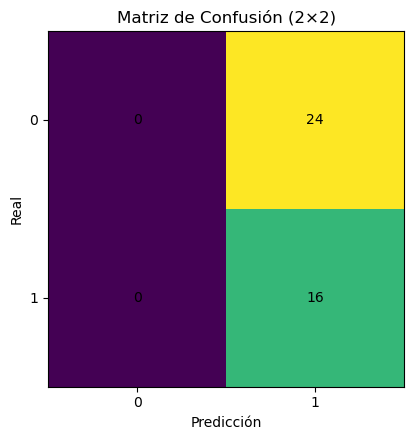

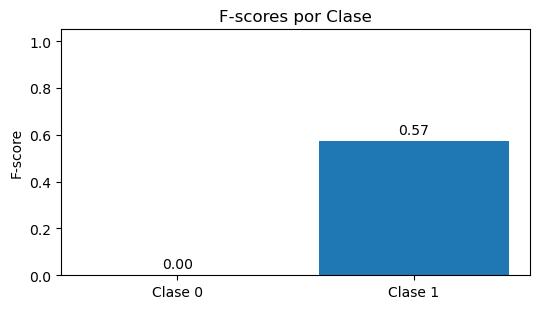

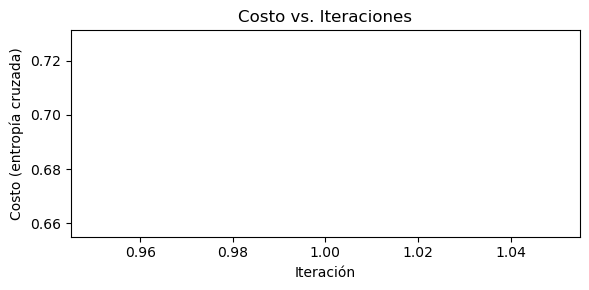

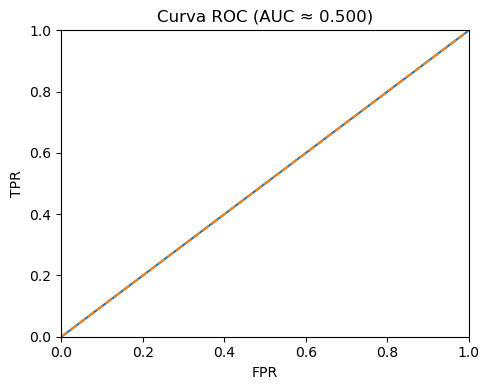

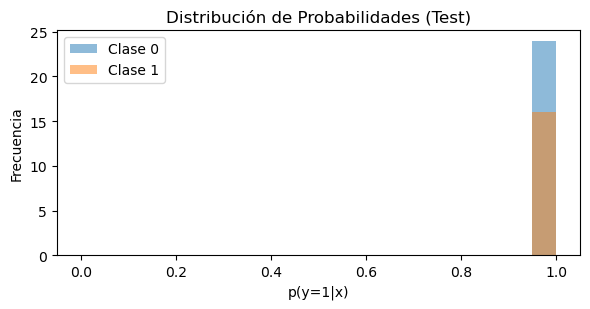

In [48]:
# ==== Visualización de métricas y diagnóstico del modelo (Etapa 3) ====
# Requisitos: cmatrix.csv (o cmatriz.csv), fscores.csv (o Fscores.csv),
#             costo.csv, pesos.csv, dtst.csv, dtst_label.csv

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- utilidades ----------
def _load_first(paths, reshape=None):
    """Carga el primer archivo existente en 'paths'. Devuelve (np.array, ruta) o (None, None)."""
    for p in paths:
        if os.path.exists(p):
            arr = pd.read_csv(p, header=None).values
            if reshape is not None:
                try:
                    arr = arr.reshape(reshape)
                except Exception:
                    pass
            return arr, p
    return None, None

def _sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

# ---------- carga de resultados mínimos ----------
cm, cm_path   = _load_first(["/mnt/data/cmatrix.csv","/mnt/data/cmatriz.csv","cmatrix.csv","cmatriz.csv"])
fs, fs_path   = _load_first(["/mnt/data/fscores.csv","/mnt/data/Fscores.csv","fscores.csv","Fscores.csv"])
cost, c_path  = _load_first(["/mnt/data/costo.csv","costo.csv"])
W, w_path     = _load_first(["/mnt/data/pesos.csv","pesos.csv"])
Xt, Xt_path   = _load_first(["/mnt/data/dtst.csv","dtst.csv"])
yt, yt_path   = _load_first(["/mnt/data/dtst_label.csv","dtst_label.csv"])

print("Cargado cmatrix:", cm_path, "shape:", None if cm is None else cm.shape)
print("Cargado fscores:", fs_path, "shape:", None if fs is None else fs.shape)
print("Cargado costo  :", c_path,   "shape:", None if cost is None else cost.shape)
print("Cargado pesos  :", w_path,   "shape:", None if W is None else W.shape)
print("Cargado dtst   :", Xt_path,  "shape:", None if Xt is None else Xt.shape)
print("Cargado labels :", yt_path,  "shape:", None if yt is None else yt.shape)

# ---------- 1) Matriz de confusión ----------
if cm is not None:
    plt.figure(figsize=(4.5,4.5))
    plt.imshow(cm, aspect="equal")
    plt.title("Matriz de Confusión (2×2)")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.xticks([0,1], ["0","1"])
    plt.yticks([0,1], ["0","1"])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(int(cm[i,j])), ha="center", va="center")
    plt.tight_layout()
    plt.show()

# ---------- 2) F-scores por clase ----------
if fs is not None:
    v = fs.reshape(-1)
    plt.figure(figsize=(5.5,3.2))
    plt.bar(range(v.size), v)
    plt.xticks(range(v.size), [f"Clase {i}" for i in range(v.size)])
    plt.ylim(0,1.05)
    plt.title("F-scores por Clase")
    plt.ylabel("F-score")
    for i,val in enumerate(v):
        plt.text(i, min(1.02, val+0.03), f"{val:.2f}", ha="center")
    plt.tight_layout()
    plt.show()

# ---------- 3) Curva de costo (entrenamiento) ----------
if cost is not None:
    c = cost.reshape(-1)
    plt.figure(figsize=(6,3.0))
    plt.plot(np.arange(1,len(c)+1), c)
    plt.title("Costo vs. Iteraciones")
    plt.xlabel("Iteración")
    plt.ylabel("Costo (entropía cruzada)")
    plt.tight_layout()
    plt.show()

# ---------- 4) ROC y AUC (si hay pesos y test) ----------
if (W is not None) and (Xt is not None) and (yt is not None):
    W = W.reshape(-1,1)
    yt = yt.reshape(-1,1)
    # Probabilidades (suponiendo que Xt ya incluye bias si W lo incluye)
    p = _sigmoid(Xt @ W).ravel()

    # Curva ROC manual (umbrales ordenados)
    thr = np.unique(p)
    tpr_list, fpr_list = [], []
    P = np.sum(yt==1)
    N = np.sum(yt==0)
    for t in np.concatenate(([1.01], thr[::-1], [-0.01])):  # barrido de 1->0
        z = (p >= t).astype(int)
        tp = np.sum((z==1) & (yt.ravel()==1))
        fp = np.sum((z==1) & (yt.ravel()==0))
        fn = np.sum((z==0) & (yt.ravel()==1))
        tn = np.sum((z==0) & (yt.ravel()==0))
        tpr = tp / (tp+fn+1e-12)
        fpr = fp / (fp+tn+1e-12)
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    # AUC por regla del trapecio
    order = np.argsort(fpr_list)
    fpr_sorted = np.array(fpr_list)[order]
    tpr_sorted = np.array(tpr_list)[order]
    auc = np.trapezoid(tpr_sorted, fpr_sorted)

    plt.figure(figsize=(5,4))
    plt.plot(fpr_sorted, tpr_sorted)
    plt.plot([0,1],[0,1], linestyle="--")
    plt.title(f"Curva ROC (AUC ≈ {auc:.3f})")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()

    # ---------- 5) Distribución de probabilidades por clase ----------
    plt.figure(figsize=(6,3.2))
    mask1 = (yt.ravel()==1)
    mask0 = (yt.ravel()==0)
    bins = np.linspace(0,1,21)
    plt.hist(p[mask0], bins=bins, alpha=0.5, label="Clase 0")
    plt.hist(p[mask1], bins=bins, alpha=0.5, label="Clase 1")
    plt.title("Distribución de Probabilidades (Test)")
    plt.xlabel("p(y=1|x)")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [49]:
def debug_predictions(X, y, W, n=10):
    """
    Muestra ejemplos de probabilidades, predicciones y etiquetas reales.
    """
    z  = X @ W
    p  = 1.0/(1.0 + np.exp(-z))
    zc = (p >= 0.5).astype(int)
    for i in range(min(n, len(y))):
        print(f"[{i}] y_real={int(y[i,0])}, p={p[i,0]:.4f}, pred={zc[i,0]}")
    
    print("\n--- Resumen ---")
    print("Media probas clase 0:", np.mean(p[y.ravel()==0]))
    print("Media probas clase 1:", np.mean(p[y.ravel()==1]))
    print("Porcentaje predicho como 1:", np.mean(zc))


In [50]:
debug_predictions(X_tst, y_tst, W_opt, n=15)


[0] y_real=1, p=1.0000, pred=1
[1] y_real=0, p=1.0000, pred=1
[2] y_real=1, p=1.0000, pred=1
[3] y_real=0, p=1.0000, pred=1
[4] y_real=0, p=1.0000, pred=1
[5] y_real=0, p=1.0000, pred=1
[6] y_real=0, p=1.0000, pred=1
[7] y_real=1, p=1.0000, pred=1
[8] y_real=0, p=1.0000, pred=1
[9] y_real=0, p=1.0000, pred=1
[10] y_real=0, p=1.0000, pred=1
[11] y_real=0, p=1.0000, pred=1
[12] y_real=1, p=1.0000, pred=1
[13] y_real=1, p=1.0000, pred=1
[14] y_real=1, p=1.0000, pred=1

--- Resumen ---
Media probas clase 0: 1.0
Media probas clase 1: 1.0
Porcentaje predicho como 1: 1.0


In [51]:
# -*- coding: utf-8 -*-
"""
Entrenamiento de Regresión Logística con Gradiente Descendente + Momentum.
Implementación purista basada en el material del Prof. Nibaldo Rodríguez.
"""

import pandas as pd
import numpy as np

# -------- funciones auxiliares --------
def sigmoid(z):
    """Función logística: f(z) = 1/(1+e^-z)"""
    return 1.0 / (1.0 + np.exp(-z))

def forward(X, W):
    """Calcula y = sigmoid(X·W) sin usar @ ni dot de numpy"""
    N, d = X.shape
    y = np.zeros((N,1))
    for i in range(N):
        z = 0.0
        for j in range(d):
            z += X[i,j] * W[j,0]
        y[i,0] = sigmoid(z)
    return y

def cross_entropy(y_true, y_pred):
    """Entropía cruzada binaria"""
    N = y_true.shape[0]
    J = 0.0
    for i in range(N):
        yt, yp = y_true[i,0], y_pred[i,0]
        J += yt*np.log(yp+1e-12) + (1-yt)*np.log(1-yp+1e-12)
    return -J/N

def gradient(X, y_true, y_pred):
    """Gradiente ∂E/∂w, manual"""
    N, d = X.shape
    g = np.zeros((d,1))
    for j in range(d):
        s = 0.0
        for i in range(N):
            s += X[i,j] * (y_pred[i,0] - y_true[i,0])
        g[j,0] = s / N
    return g

# -------- entrenamiento --------
def train(X, y, alpha=0.01, beta=0.9, epochs=100):
    """Entrenamiento con momentum"""
    N, d = X.shape
    W = np.zeros((d,1))
    V = np.zeros((d,1))
    costs = []

    for k in range(epochs):
        y_hat = forward(X, W)
        J = cross_entropy(y, y_hat)
        g = gradient(X, y, y_hat)
        V = beta*V + alpha*g
        W = W - V
        costs.append(J)

        # Debug textual cada 10%
        if k % max(1, epochs//10) == 0 or k == epochs-1:
            preds = (y_hat >= 0.5).astype(int)
            acc = np.mean(preds == y)
            print(f"[Iter {k:4d}] Costo={J:.4f}, Acc={acc:.3f}")

    return W, np.array(costs).reshape(-1,1)

# -------- main --------
def main():
    # Cargar datos
    X = pd.read_csv("dtrn.csv", header=None).values
    y = pd.read_csv("dtrn_label.csv", header=None).values
    print("Datos cargados:", X.shape, y.shape)

    # Entrenar
    W, Cost = train(X, y, alpha=0.1, beta=0.9, epochs=200)

    # Guardar resultados
    pd.DataFrame(W).to_csv("pesos.csv", header=False, index=False)
    pd.DataFrame(Cost).to_csv("costo.csv", header=False, index=False)
    print("Pesos y costo guardados.")

if __name__ == "__main__":
    main()


Datos cargados: (160, 1201) (160, 1)
[Iter    0] Costo=0.6931, Acc=0.525
[Iter   20] Costo=0.5543, Acc=0.925
[Iter   40] Costo=0.4127, Acc=0.988
[Iter   60] Costo=0.3222, Acc=1.000
[Iter   80] Costo=0.2628, Acc=1.000
[Iter  100] Costo=0.2211, Acc=1.000
[Iter  120] Costo=0.1904, Acc=1.000
[Iter  140] Costo=0.1669, Acc=1.000
[Iter  160] Costo=0.1483, Acc=1.000
[Iter  180] Costo=0.1334, Acc=1.000
[Iter  199] Costo=0.1216, Acc=1.000
Pesos y costo guardados.
